## Task
Examine performance in the ideal case when all assumptions are satisfied

## Notebook Summary
* Generate sample dataset using *make_blobs* with the properties below:
 * Clusters are well-separated 
 * Clusters have similar number of points
 * Clusters have similar variance
 * Clusters have isotropic/spherical variance
* Run KMeans on this dataset
* Examine various metrics to evaluate 'goodness' of clustering


In [1]:
# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import platform
print 'python.version = ', platform.python_version()
import IPython
print 'ipython.version =', IPython.version_info

import numpy as np
print 'numpy.version = ', np.__version__
import pandas as pd
print 'pandas.version = ', pd.__version__

import sklearn
print 'sklearn.version = ', sklearn.__version__

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib
print 'matplotlib.version = ', matplotlib.__version__
import matplotlib.pyplot as plt

import seaborn as sns
print 'seaborn.version = ', sns.__version__

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics


python.version =  2.7.10
ipython.version = (5, 1, 0, '')
numpy.version =  1.11.3
pandas.version =  0.19.2
sklearn.version =  0.18.1
matplotlib.version =  1.5.3
seaborn.version =  0.7.1


array([1, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2,
       2, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0, 0,
       1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0,
       2, 2, 1, 0, 0, 0, 1, 1])

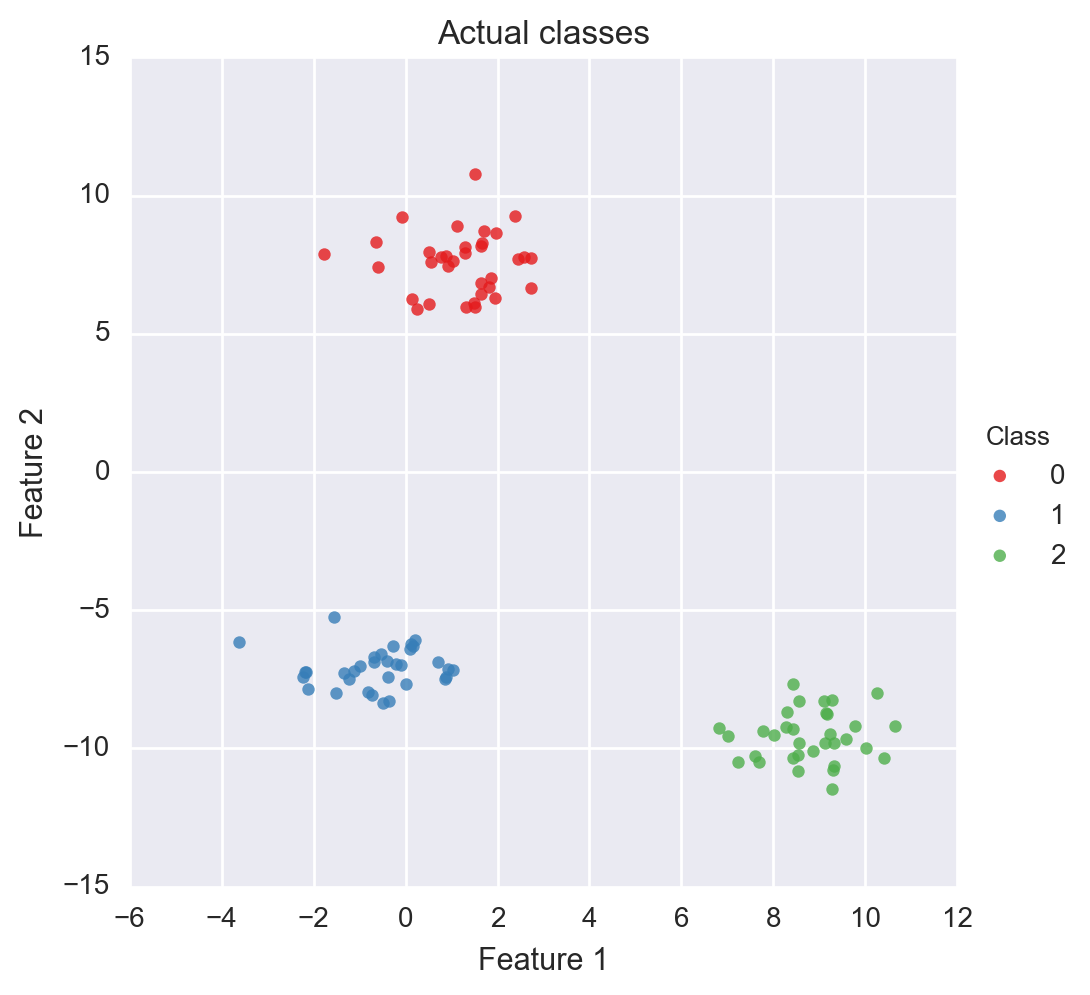

In [16]:
# Generate sample dataset for clustering using make_blobs
# Each blob is generated from a Gaussian dist.

X, true_labels = make_blobs(n_samples=100, n_features=2, centers=3, random_state=13112016)
df = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1],
        'Class': actual_classes
    }).round(2)

g = sns.lmplot(x='Feature 1', y='Feature 2', data=df, hue='Class', palette='Set1', fit_reg=False)
plt.title('Actual classes');

true_labels


In [10]:
# Cluster data using KMeans

kmeans_est = KMeans(n_clusters=3).fit(X)

array([2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0,
       0, 2, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 0, 1, 1,
       2, 2, 0, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1,
       0, 0, 2, 1, 1, 1, 2, 2], dtype=int32)

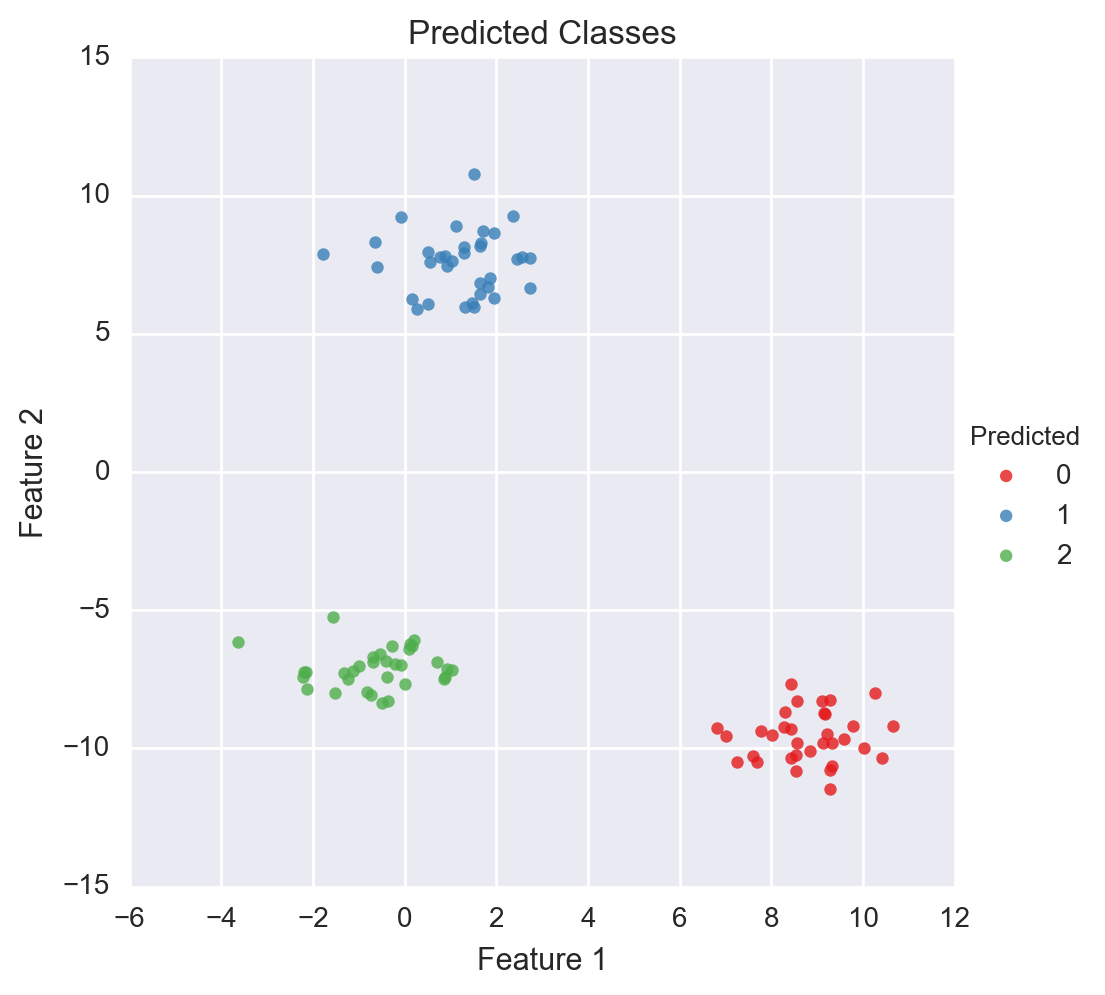

In [20]:
# Predict labels for training data
predicted_labels = kmeans_est.predict(X)

df_predicted = pd.DataFrame({
        'Feature 1':df['Feature 1'], 
        'Feature 2':df['Feature 2'], 
        'Predicted':predicted_labels
    })

g = sns.lmplot(x='Feature 1', y='Feature 2', data=df_predicted, hue='Predicted', palette='Set1', fit_reg=False)
plt.title('Predicted Classes');

predicted_labels
# fix labels
idx_0, idx_1, idx_2 = (np.where(predicted_labels == n) for n in range(3))
predicted_labels[idx_0], predicted_labels[idx_1], predicted_labels[idx_2] = 2, 0, 1


In [21]:
# Accuracy Metric - confusion matrix
# Truth must be known

metrics.confusion_matrix(true_labels, predicted_labels)


array([[34,  0,  0],
       [ 0, 33,  0],
       [ 0,  0, 33]])

In [23]:
# Accuracy Metric - Adjusted Rand Index
# Truth must be known

print 'Adjusted Rand Index = {} \n'.format(round(metrics.adjusted_rand_score(actual_classes, predicted_classes),3))


Adjusted Rand Index = 1.0 



In [25]:
# Accuracy Metrics - Mutual Information scores
# Truth must be known

print 'Mutual Information score = ', round(metrics.mutual_info_score(actual_classes, predicted_classes),3)
print 'Adjusted Mutual Information score = ', round(metrics.adjusted_mutual_info_score(actual_classes, predicted_classes),3)
print 'Normalized Mutual Information score = {} \n'.format(round(metrics.normalized_mutual_info_score(actual_classes, predicted_classes),3))


Mutual Information score =  1.099
Adjusted Mutual Information score =  1.0
Normalized Mutual Information score = 1.0 



In [29]:
# Homogeneity score, Completeness scores & V measure
# Truth must be known

print 'Homogeneity score = ', round(metrics.homogeneity_score(actual_classes, predicted_classes),3)
print 'Completeness score = ', round(metrics.completeness_score(actual_classes, predicted_classes),3)
print 'V-Measure = ', round(metrics.v_measure_score(actual_classes, predicted_classes),3)
print '(H, C, V) = {} \n'.format(np.around(metrics.homogeneity_completeness_v_measure(actual_classes, predicted_classes), decimals=2))


Homogeneity score =  1.0
Completeness score =  1.0
V-Measure =  1.0
(H, C, V) = [ 1.  1.  1.] 



In [28]:
# Accuracy Metric - Fowlkes-Mallows score
# Truth must be known

print 'Fowlkes-Mallows score = {} \n'.format(round(metrics.fowlkes_mallows_score(actual_classes, predicted_classes),3))


Fowlkes-Mallows score = 1.0 



In [27]:
# Accuracy Metric - Truth is not known

# Inertia
print 'Inertia = ', round(kmeans_est.inertia_,3)

# Sihouette Score
print 'Silhouette score = ', round(metrics.silhouette_score(X, predicted_classes),3)

# Calinski-Harabaz Index
print 'Calinski-Harabaz score = ', round(metrics.calinski_harabaz_score(X, predicted_classes),3)

Inertia =  182.097
Silhouette score =  0.847
Calinski-Harabaz score =  1976.436
